In [ ]:
!pip install mediapipe opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 1.3 MB/s 


In [ ]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
from google.colab.patches import cv2_imshow

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


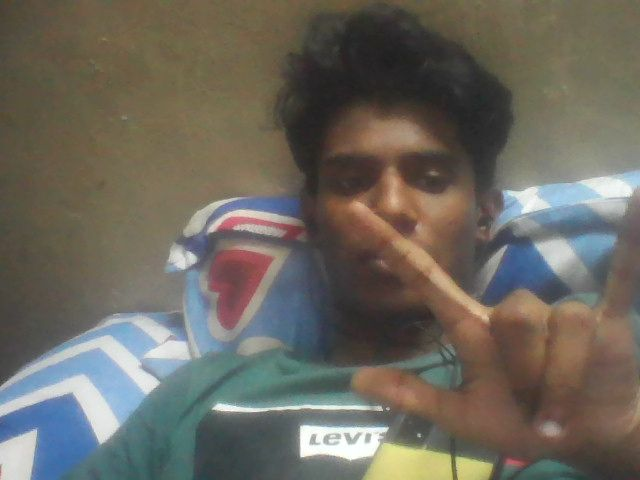

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<class 'mediapipe.python.solution_base.SolutionOutputs'>


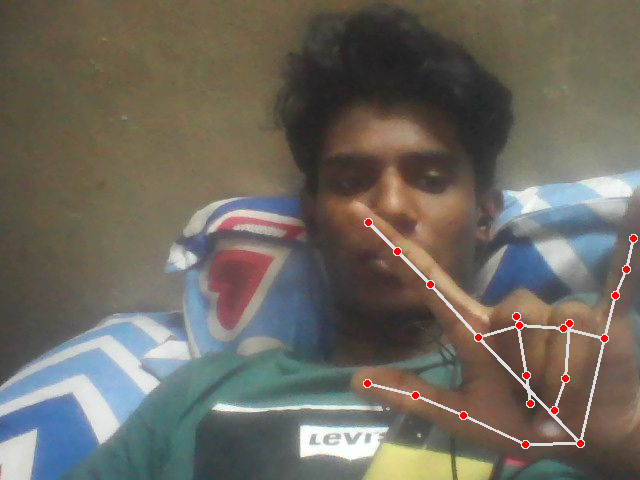

In [ ]:
cap = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: #You can pass `max_num_hands` argument here as well if you want to detect more that one hand

        image = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)

        image.flags.writeable = False

        results = hands.process(image)

        image.flags.writeable = True

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        print(results)

        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                         )

        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2_imshow(image)

cv2.destroyAllWindows()